In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [87]:
df = pd.read_csv('C:/Users/Tushar/Dropbox/Python/01_Gapminder_data/gapminder.csv')

In [88]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 10.9+ KB


In [90]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


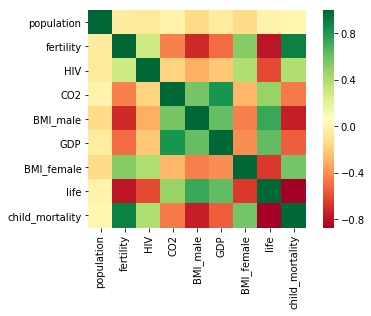

In [91]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

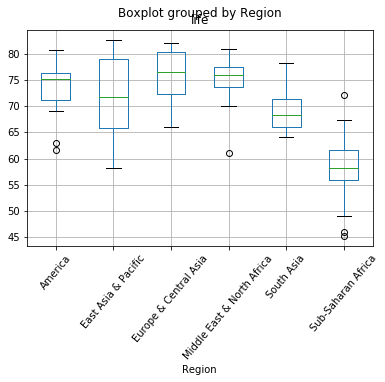

In [116]:
# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=50)
plt.show()

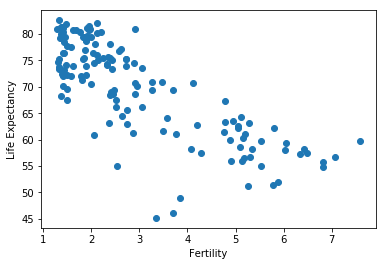

In [92]:
#A scatter plot with 'fertility' on the x-axis and 'life expectancy' on the y-axis
plt.scatter(df['fertility'], df['life'])
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

In [93]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

In [94]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [95]:
# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

In [96]:
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [97]:
# Create the regressor
reg = LinearRegression()

In [98]:
# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [99]:
# Fit the model to the data
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
# Compute predictions over the prediction space
y_pred = reg.predict(prediction_space)

In [101]:
# Print R^2 
print(reg.score(X, y))

0.6192442167740035


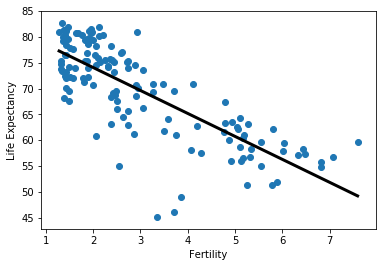

In [102]:
# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(df['fertility'], df['life'])
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

In [103]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [104]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [105]:
# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

In [107]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


In [108]:
# Create a linear regression object
reg = LinearRegression()

In [109]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

In [110]:
# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


In [111]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

0.6294715754653507


In [112]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.5883937741571185
